<a href="https://colab.research.google.com/github/PaulErpen/Machine-Learning-Exercise-1/blob/main/Group24_Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning: Exercise 1
Group 24: Jasmin Wolff (12114335), Mihai Truta (12122518), Paul Erpenstein (12107369)

In [75]:
!pip install d2l==0.17.0
!pip install -U mxnet-cu101==1.7.0

     |████████████████████████████████| 83 kB 1.1 MB/s 
     |███████████████████████████████▌| 834.1 MB 1.2 MB/s eta 0:00:10tcmalloc: large alloc 1147494400 bytes == 0x55cf3ee12000 @  0x7feb5d8df615 0x55cf064d54cc 0x55cf065b547a 0x55cf064d82ed 0x55cf065c9e1d 0x55cf0654be99 0x55cf065469ee 0x55cf064d9bda 0x55cf0654bd00 0x55cf065469ee 0x55cf064d9bda 0x55cf06548737 0x55cf065cac66 0x55cf06547daf 0x55cf065cac66 0x55cf06547daf 0x55cf065cac66 0x55cf06547daf 0x55cf064da039 0x55cf0651d409 0x55cf064d8c52 0x55cf0654bc25 0x55cf065469ee 0x55cf064d9bda 0x55cf06548737 0x55cf065469ee 0x55cf064d9bda 0x55cf06547915 0x55cf064d9afa 0x55cf06547c0d 0x55cf065469ee
     |████████████████████████████████| 846.0 MB 24 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [77]:
import pandas
import numpy
from sklearn import metrics
from matplotlib import pyplot as plt
from google.colab import drive
drive.mount("/content/gdrive")

from mxnet import np, npx
from d2l import mxnet as d2l
npx.set_np()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Data set 1: Location 

First data set from the kaggle competition.

In [27]:
df_locations = pandas.read_csv("/content/gdrive/MyDrive/data/locations.csv")
print(df_locations.head())
print("This data set has {} observations.".format(df_locations.shape[0]))

   ID  class  1  2  3  4  5  6  7  ...  438  439  440  441  442  443  444  445  446
0   0     11  0  0  0  1  1  0  0  ...    0    0    0    1    0    0    0    0    0
1   1      3  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0    0
2   2      9  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0    0
3   3      8  0  0  0  1  0  0  0  ...    0    0    0    1    0    0    0    0    0
4   4      3  0  1  0  0  0  0  0  ...    0    0    0    0    0    1    0    0    0

[5 rows x 448 columns]
This data set has 4000 observations.


Each of these observations represents a person. There are 446 binary attributes, which denote wether a person has visited a specific location or not. Every person also belongs to a class. The task is to determine a persons class based on the places they visited.

## Exploration & Preprocessing

In [28]:
df_locations.isnull().sum().sum()

0

There are no missing values in this data set and therefore no preprocessing needed.

In [29]:
print("There are {} unique classes a person can belong to.".format(len(df_locations["class"].unique())))

There are 30 unique classes a person can belong to.


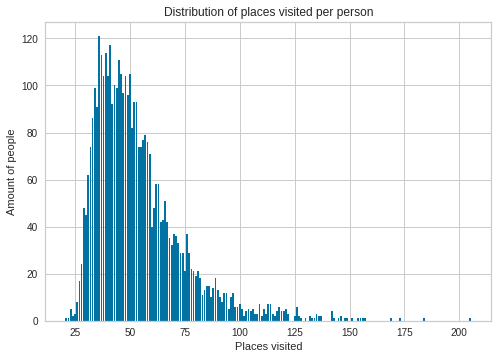

In [30]:
places_visited = df_locations.loc[:, '1':'446'].sum(axis=1) 
places_visited_distribution = places_visited.groupby(places_visited).count()
df_places_visited = pandas.DataFrame(data = {"nplaces" : places_visited_distribution.index, "countpeople": places_visited_distribution})
plt.bar(df_places_visited["nplaces"], df_places_visited["countpeople"])
plt.title("Distribution of places visited per person")
plt.ylabel("Amount of people")
plt.xlabel("Places visited")
plt.show()

A thing also worth considering is the amount of different places a person has visited. This might be a very predictive variable. This plot shows the amount of people grouped by how many places they have visited. There is a clear normal distribution, indicating that this measurement has a structure to it that might have predictive qualities.

In [6]:
#df_locations["n_places_visited"] = df_locations.loc[:, '1':'446'].sum(axis=1) 

Turns out this decreases prediction performance.

### Train and test split



In [35]:
from sklearn.model_selection import train_test_split

y = df_locations.copy(deep="true")["class"]
X = df_locations.copy(deep="true").drop('class', axis=1).drop('ID', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print("The size of the training split is {} and the size of the test split is {}.".format(X_train.shape[0], X_test.shape[0]))

display(X_train)

The size of the training split is 3200 and the size of the test split is 800.


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446
1420,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1638,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
616,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,1,1,0,0,0,1,0,0,1,1,0,1,1,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
184,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2075,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
1346,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3454,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3437,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0


### Scaling

In [36]:
from sklearn import preprocessing

scaler_location = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler_location.transform(X_train)
X_test_scaled = scaler_location.transform(X_test)
display(X_train_scaled)

array([[ 4.02545663, -0.46554273, -0.23167086, ..., -0.25888673,
         2.65715137, -0.24699789],
       [-0.24841902, -0.46554273, -0.23167086, ..., -0.25888673,
        -0.37634288, -0.24699789],
       [-0.24841902, -0.46554273, -0.23167086, ...,  3.8626931 ,
        -0.37634288, -0.24699789],
       ...,
       [-0.24841902, -0.46554273, -0.23167086, ..., -0.25888673,
        -0.37634288, -0.24699789],
       [-0.24841902, -0.46554273, -0.23167086, ..., -0.25888673,
        -0.37634288, -0.24699789],
       [-0.24841902, -0.46554273, -0.23167086, ..., -0.25888673,
        -0.37634288, -0.24699789]])

## KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1, 26)
scores = {}

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train_scaled, y_train)
  y_pred = knn.predict(X_test_scaled)
  scores[k] = metrics.accuracy_score(y_test, y_pred)

display(scores)

{1: 0.295,
 2: 0.30875,
 3: 0.29375,
 4: 0.3075,
 5: 0.31,
 6: 0.325,
 7: 0.33375,
 8: 0.3375,
 9: 0.33125,
 10: 0.33875,
 11: 0.3375,
 12: 0.33625,
 13: 0.335,
 14: 0.3325,
 15: 0.34,
 16: 0.33,
 17: 0.3325,
 18: 0.33625,
 19: 0.3325,
 20: 0.33625,
 21: 0.34375,
 22: 0.34,
 23: 0.33875,
 24: 0.34375,
 25: 0.33875}

# Neural Network/Multilayer Perceptron 

## Training

According to Heaton there is no theoratical basis for using a network with more than two layers [Heat08].

In [80]:
from sklearn.neural_network import MLPClassifier

scores_1 = {}
scores_2 = {}

def fit_multilayer_perceptron(hidden_layer_sizes, X_train, y_train, X_test, y_test):
  multi_layer_perceptron = MLPClassifier(solver='lbfgs', random_state=123, hidden_layer_sizes=hidden_layer_sizes)
  multi_layer_perceptron.fit(X_train, y_train)
  y_pred = multi_layer_perceptron.predict(X_test)
  return metrics.accuracy_score(y_test, y_pred)

devices = d2l.try_all_gpus()
with d2l.Benchmark("Neural network on multiple CPU"):
  fit_multilayer_perceptron((20,), X_train, y_train, X_test, y_test)
  fit_multilayer_perceptron((20,), X_train, y_train, X_test, y_test)

with d2l.Benchmark("Neural network on single CPU 1"):
  fit_multilayer_perceptron((20,), X_train, y_train, X_test, y_test)

with d2l.Benchmark("Neural network on single CPU 2"):
  fit_multilayer_perceptron((20,), X_train, y_train, X_test, y_test)

Neural network on multiple CPU: 4.9002 sec
Neural network on single CPU 1: 2.4403 sec
Neural network on single CPU 2: 2.4650 sec


ValueError: ignored

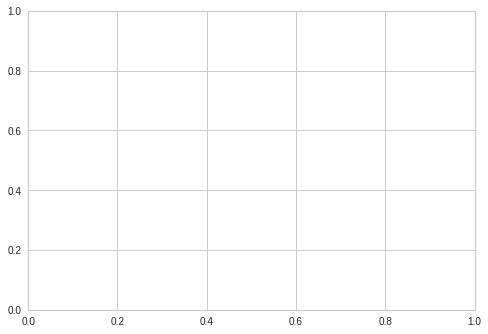

In [73]:
plt.plot(list(scores_1.keys()), list(scores.values()))
plt.plot(list(scores_2.keys()), list(scores.values()))
plt.show()

## Evaluation

0.75375

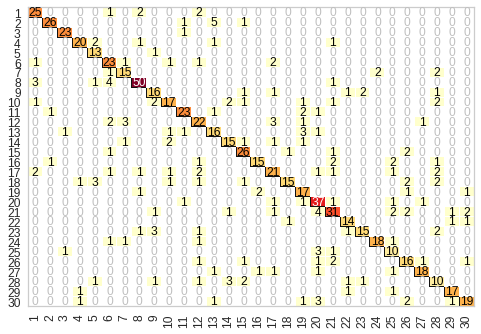

In [42]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(multi_layer_perceptron, classes=sorted (df_locations["class"].unique()))
cm.score(X_test, y_test)

## Decision Tree

In [ ]:
from sklearn import tree

decision_tree = tree.DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
print("The prediciton accurancy for the decision tree is {}.".format(metrics.accuracy_score))

# Data set 2: Congressional Voting

Second data set from the kaggle competition.

In [ ]:
df_congress = pandas.read_csv("/content/gdrive/MyDrive/data/congressional.csv")
print(df_congress.head())

    ID       class  ... duty-free-exports export-administration-act-south-africa
0   67  republican  ...                 n                                      y
1  338    democrat  ...                 y                                      y
2   35    democrat  ...                 y                                      y
3  122  republican  ...                 n                                      y
4  420    democrat  ...                 n                                      y

[5 rows x 18 columns]


# Data set 3: COVID-19

The data set from exercise 0.

In [ ]:
df_covid = pandas.read_csv("/content/gdrive/MyDrive/data/covid.csv")
print(df_covid.head())

       id  sex  patient_type  ... contact_other_covid covid_res icu
0  16169f    2             1  ...                   2         1  97
1  1009bf    2             1  ...                  99         1  97
2  167386    1             2  ...                  99         1   2
3  0b5948    2             2  ...                  99         1   2
4  0d01b5    1             2  ...                  99         1   2

[5 rows x 23 columns]


# Data set 4: Airline customer satisfaction

A completely new data set for classifocation.

In [ ]:
df_airline = pandas.read_csv("/content/gdrive/MyDrive/data/airline.csv")
print(df_airline.head())

   Unnamed: 0      id  ... Arrival Delay in Minutes             satisfaction
0           0   70172  ...                     18.0  neutral or dissatisfied
1           1    5047  ...                      6.0  neutral or dissatisfied
2           2  110028  ...                      0.0                satisfied
3           3   24026  ...                      9.0  neutral or dissatisfied
4           4  119299  ...                      0.0                satisfied

[5 rows x 25 columns]


# Sources

[Heat08] Jeff Heaton. 2008. <i>Introduction to Neural Networks for Java, 2nd Edition</i> (2nd. ed.). Heaton Research, Inc.